In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

In [2]:
# Generate synthetic dataset for testing purposes
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)

# Convert to DataFrame for easier handling
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display first few rows of the dataset
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,1.470848,-0.360450,-0.591602,-0.728228,0.941690,1.065964,0.017832,-0.596184,1.840712,-1.497093,...,-0.603968,2.899256,0.037567,-1.249523,0.257963,0.416628,1.408208,-1.838041,-0.833142,1
1,4.513369,-2.227103,-1.140747,2.018263,-2.238358,-0.497370,0.714550,0.938883,-2.395169,0.159837,...,1.461499,3.954171,0.309054,0.538184,-7.157865,-4.532216,-0.081800,-9.325362,0.574386,1
2,-2.355643,2.218601,-1.603269,0.873394,0.401483,0.717264,-0.859399,-1.042190,-2.175965,0.980231,...,0.544434,-2.466258,-0.470256,0.073018,-2.203531,-2.299263,-1.742761,-0.271579,-0.359285,0
3,-1.596198,-0.857427,1.772434,-0.639361,1.419409,-0.438525,0.281949,2.345145,1.006230,0.389135,...,-1.025051,-2.422975,1.579807,-0.300713,4.267120,2.893775,1.236697,6.034785,-0.045711,0
4,2.840049,-2.489600,-0.844902,-1.594362,-4.688517,0.459637,0.913607,-1.143505,1.263937,-2.040928,...,4.176424,1.341742,0.133565,1.743819,1.531188,2.269808,0.053489,-3.151109,1.603702,0


In [4]:
# Splitting the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train a RandomForest Classifier without any preprocessing
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

Baseline Accuracy: 0.9150


In [6]:
# Introduce missing values in the dataset for testing
df.iloc[::10, 0] = np.nan  # Introduce NaN values

# Imputing missing values and training the model
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

accuracy_imputed = accuracy_score(y_test, y_pred)
print(f'Accuracy after imputing missing values: {accuracy_imputed:.4f}')

Accuracy after imputing missing values: 0.9150


In [7]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred)
print(f'Accuracy after standardization: {accuracy_scaled:.4f}')

Accuracy after standardization: 0.9150


In [8]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)

accuracy_normalized = accuracy_score(y_test, y_pred)
print(f'Accuracy after normalization: {accuracy_normalized:.4f}')

Accuracy after normalization: 0.9150


In [9]:
# Let's say we have some categorical features
df_categorical = pd.DataFrame({
    'categorical_feature': np.random.choice(['A', 'B', 'C'], size=1000),
    'target': y
})

X = pd.get_dummies(df_categorical.drop('target', axis=1), drop_first=True)
y = df_categorical['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_encoded = accuracy_score(y_test, y_pred)
print(f'Accuracy after one-hot encoding categorical features: {accuracy_encoded:.4f}')

Accuracy after one-hot encoding categorical features: 0.5250


In [10]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_imputed, y_train)
X_test_selected = selector.transform(X_test_imputed)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred)
print(f'Accuracy after feature selection: {accuracy_selected:.4f}')

Accuracy after feature selection: 0.8850


In [12]:
from sklearn.decomposition import PCA

# Using PCA for dimensionality reduction
pca = PCA(n_components=10)  # Reduce to 10 components
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred)
print(f'Accuracy after PCA: {accuracy_pca:.4f}')

Accuracy after PCA: 0.8950


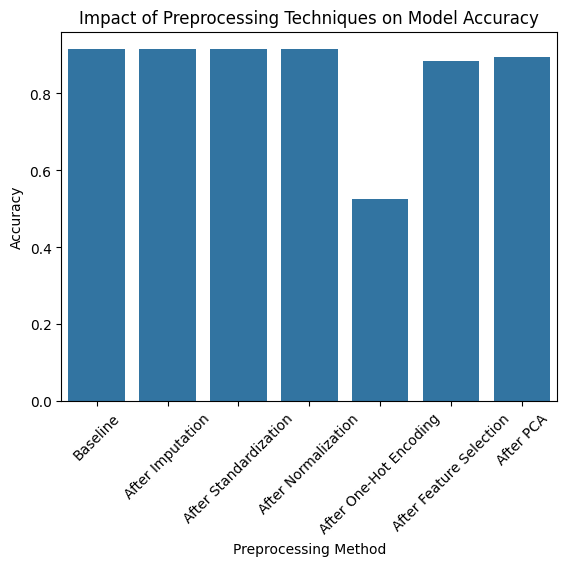

In [13]:
# Summary of accuracies
results = {
    "Baseline": baseline_accuracy,
    "After Imputation": accuracy_imputed,
    "After Standardization": accuracy_scaled,
    "After Normalization": accuracy_normalized,
    "After One-Hot Encoding": accuracy_encoded,
    "After Feature Selection": accuracy_selected,
    "After PCA": accuracy_pca
}

results_df = pd.DataFrame(list(results.items()), columns=['Preprocessing Method', 'Accuracy'])
sns.barplot(data=results_df, x='Preprocessing Method', y='Accuracy')
plt.title('Impact of Preprocessing Techniques on Model Accuracy')
plt.xticks(rotation=45)
plt.show()

In [15]:
print(results)

{'Baseline': 0.915, 'After Imputation': 0.915, 'After Standardization': 0.915, 'After Normalization': 0.915, 'After One-Hot Encoding': 0.515, 'After Feature Selection': 0.885, 'After PCA': 0.895}


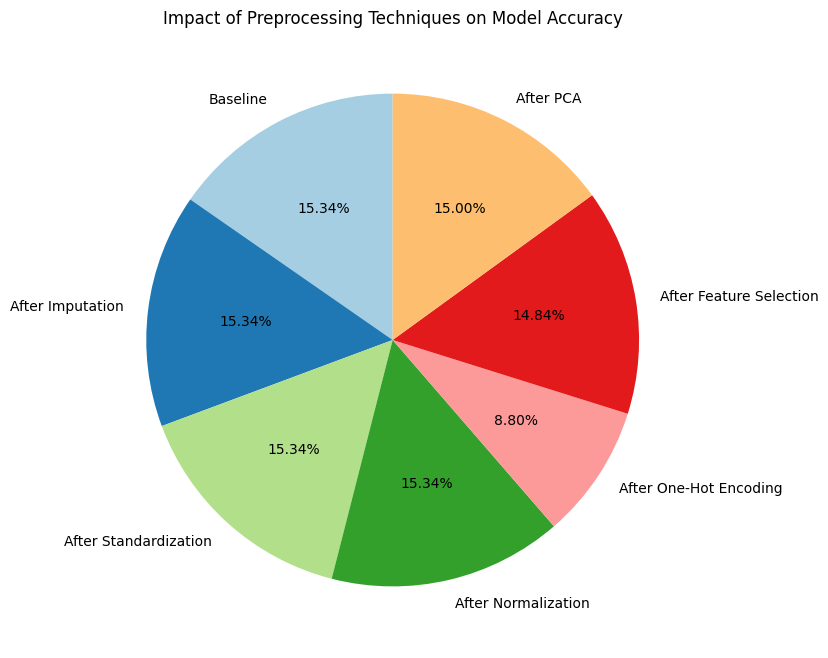

In [14]:
import matplotlib.pyplot as plt



# Prepare data for the pie chart
labels = results.keys()
sizes = [accuracy * 100 for accuracy in results.values()]  # Convert to percentage

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Impact of Preprocessing Techniques on Model Accuracy')
plt.show()


In [16]:
accuracies = [
    ("Baseline", baseline_accuracy * 100),
    ("Standardization",accuracy_scaled * 100),
    ("Encoded", accuracy_encoded * 100),
    ("SMOTE", accuracy_imputed * 100),
    ("Feature Selection", accuracy_selected * 100),
    ("PCA", accuracy_pca* 100)
]
# Convert the list into a DataFrame
accuracy_df = pd.DataFrame(accuracies, columns=["Model", "Accuracy (%)"])

# Display the table
print(accuracy_df)

               Model  Accuracy (%)
0           Baseline          91.5
1    Standardization          91.5
2            Encoded          52.5
3              SMOTE          91.5
4  Feature Selection          88.5
5                PCA          89.5
